# <center> Salary Prediction</center>

<b>Problem on Hand: </b> Given a data set which  captures gross salary from July 1, 2013 through June 30, 2014 and includes only those employees who were employed on June 30, 2014.
Predict the Salaries for Employees in Blatimore

# Outline
1. Import Datasets
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis 
4. Feature Engineering
5. Train Test Split
6. Model Building
7. Model Evaluation

In [1]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# import library for Scaling
from sklearn.preprocessing import StandardScaler

# import library for Model Building
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Importing the data set 

<b> The data set is in csv format and can be imported using read_csv method available in pandas library.</b>

In [2]:
# Import the data set
salary_org = pd.read_csv("train.csv")

# Print top 5 rows of dataset
salary_org.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


##  Data Cleaning and Preparation

In [3]:
# Check the info of data set
salary_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


<b> Its always a good practice to work on copy of data set instead of the Original Data set itself. Hence Creating a copy of data set.</b>

In [4]:
# Create a copy of data set
salary_cpy = salary_org.copy()

In [5]:
# Check column names
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

<b> Since Name has leading space lets remove it.</b>

In [6]:
# Remove leading and trailing edges
salary_cpy.columns = salary_cpy.columns.str.strip()

# print coloumns after stripping spaces
print("After Removing leading and trailing spaces:", salary_cpy.columns)

After Removing leading and trailing spaces: Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')


<b>The first and formost step before we jump into Analysis is Treating Null Values. So let us Check Null values.</b>

In [7]:
# Check Null Values in data set
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

<b>There are null values in HireDate and GrossPay Columns. Let's work on each of them.</b>
<br>
<b> There are 70 null values in HireDate which is less than 1% of values so dropping those rows.</b>

In [8]:
# Remove rows having empty hire date
salary_cpy = salary_cpy.dropna(subset=['HireDate'])

# Check null Values
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

<b> There are no null values in HireDate Column. Moving on to GrossPay.</b>
<br>
<b>Gross Pay is dependent on Annual salary. So these two are interrelated and only one of this can be used as dependent variable. As we have null values in GrossPay, dropping that column)</b>

In [9]:
# Drop Gross Pay column
salary_cpy=salary_cpy.drop(columns='GrossPay',axis=1)

# Check null Values
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

<b> Let us check value counts for all columns</b>

In [10]:
# Value_counts for AgencyID
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
A65113      1
W02534      1
W02339      1
W02524      1
W02597      1
Name: AgencyID, Length: 1177, dtype: int64

In [11]:
# Value_counts for Agency
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
M-R Labor Commissioner         6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [12]:
# Value_counts for JobTitle
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                  4817
POLICE OFFICER                  1866
LABORER (Hourly)                 597
EMT Firefighter Suppression      358
CROSSING GUARD                   337
                                ... 
FIREARMS EXAMINER SUPERVISOR       1
HRIS Specialist                    1
WEB DEVELOPER                      1
EMPLOYEE BENEFITS ASSISTANT        1
LINE MAINT TECHNICIAN SUPV         1
Name: JobTitle, Length: 1073, dtype: int64

In [13]:
#Value counts on HireDate
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
08/03/1981       1
10/30/2010       1
09/28/2007       1
07/30/2008       1
11/16/2001       1
Name: HireDate, Length: 4737, dtype: int64

In [14]:
#Value counts on Annual Salary
salary_cpy.AnnualSalary.value_counts()

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     162
             ... 
$46934.00       1
$52200.00       1
$50782.00       1
$96310.00       1
$35006.00       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [15]:
# Removing $ from Annual Salary and converting it into float format
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [16]:
# Value counts on Annual Salary
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [17]:
# lets also break the Date into year ,month and day
salary_cpy['HireDay'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[3:5])))
salary_cpy['HireMonth'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[0:2])))
salary_cpy['HireYear'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[6:])))

# Print info to check whether columns are added
salary_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireDay       18911 non-null  int64  
 7   HireMonth     18911 non-null  int64  
 8   HireYear      18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [18]:
# Trim spaces
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).strip().replace("  "," "))

In [19]:
# Changing to upper case
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).upper())
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).upper())
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).upper())

<b> The last thing left in Data Preparation is Outlier Treatment. So lets create Box plot for Annual Salary and check for Outliers </b>

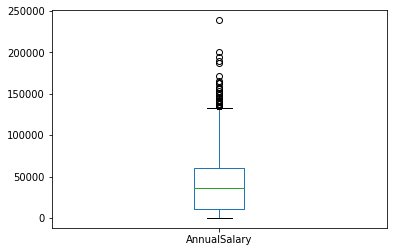

In [20]:
# Create Box Plot for Annual Salary
salary_cpy.AnnualSalary.plot.box()
plt.show()

<b> There are few Salaries which are way far from other Salaries.
They might effect the prediction. So we have to eliminate them.
 Lets check the Summary Statistics as well.</b>

In [21]:
# SUMMARY STATS OF AnnualSalary
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

<b>As it can be seen, the max value is way more than mean, median. Let's delete rows whose annual salary > 1500000 according to box plot</b>

In [22]:
salary_cpy = salary_cpy[salary_cpy['AnnualSalary']<150000]
salary_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  object 
 2   AgencyID      18895 non-null  object 
 3   Agency        18895 non-null  object 
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


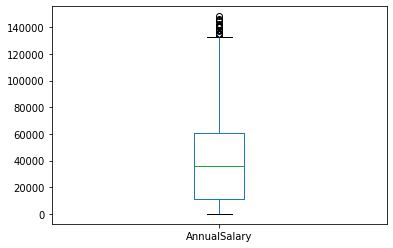

In [23]:
# Create Box Plot for Annual Salary
salary_cpy.AnnualSalary.plot.box()
plt.show()

<b>All the data points above the 75% line are very close to each other so leaving it as is. </b>

## Exploratory Data Analysis

<b>We will first check the distribution of of Annual Salary by creating a distplot </b>

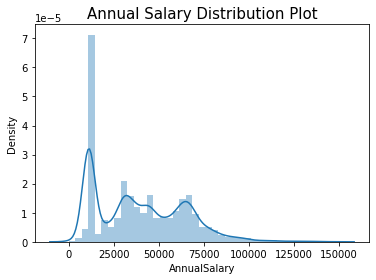

In [24]:
# Check distribution of Target Variable
sns.distplot(salary_cpy.AnnualSalary)
plt.title("Annual Salary Distribution Plot",fontsize=15)
plt.show()

<b> The data is distributed very randomly and there seems to be not many people with salary more than 100000</b>

<b>Let us check jobs for which people are being hired the most. For this we will be creating a barplot <b>

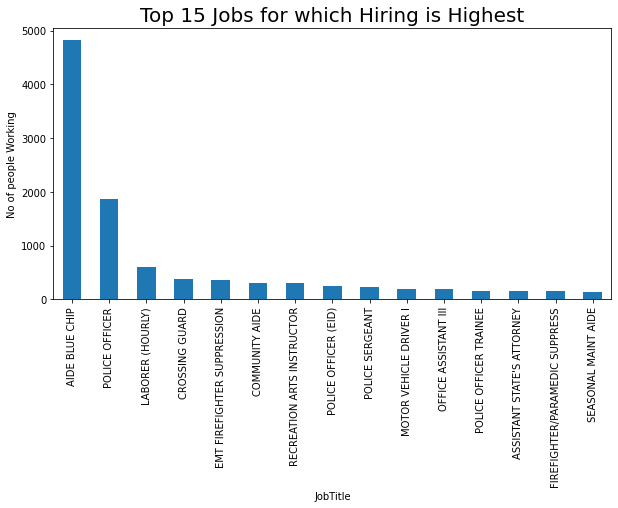

In [25]:
#Top 10 Jobs that based on hirings
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(15).plot.bar()
plt.ylabel('No of people Working')
plt.title("Top 15 Jobs for which Hiring is Highest",fontsize=20)
plt.show()

<b>The above plot clearly shows more number of People are working as AIDE BLUE CHIP which  has over double the workers working as POLICE OFFICER which is second Highest. All the remaining JobTitles have less than 1000 Workers </b>

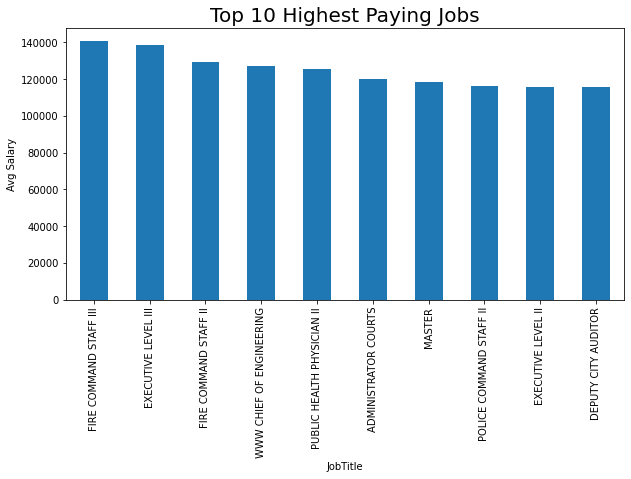

In [26]:
#Top 10 Jobs that fetch highest Salary
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.title("Top 10 Highest Paying Jobs",fontsize=20)
plt.show()

<b> Let us check the top 10 Agencies and AgencyID with highest number of employees </b>

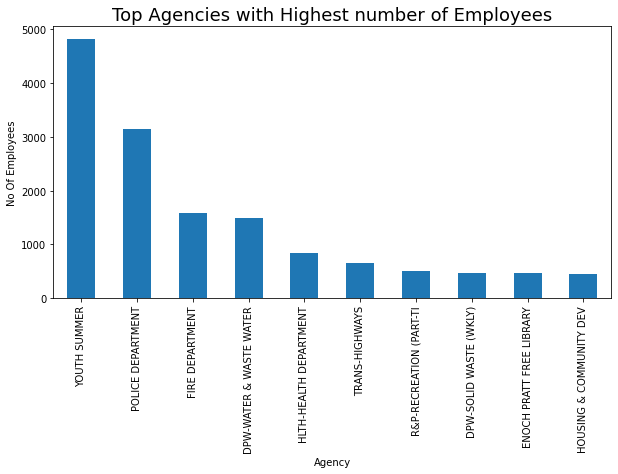

In [27]:
#Top 10 Agencies that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top Agencies with Highest number of Employees",fontsize=18)
plt.show()

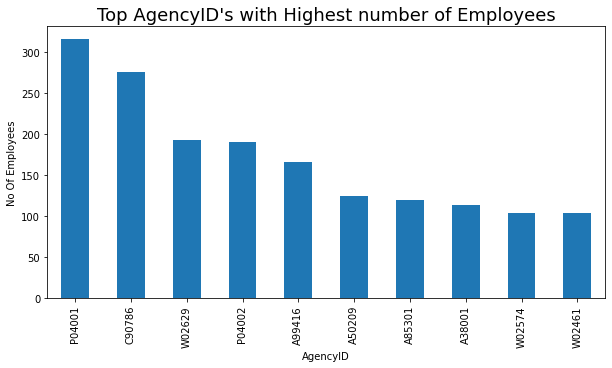

In [28]:
#Top 10 AgencyID that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top AgencyID's with Highest number of Employees",fontsize=18)
plt.show()

<b> Let us check the people hired in which year have lowest Salaries. This is to check as the Hire Year increases, the Salary decreases. Because, Salary is high for people who have high experience </b>

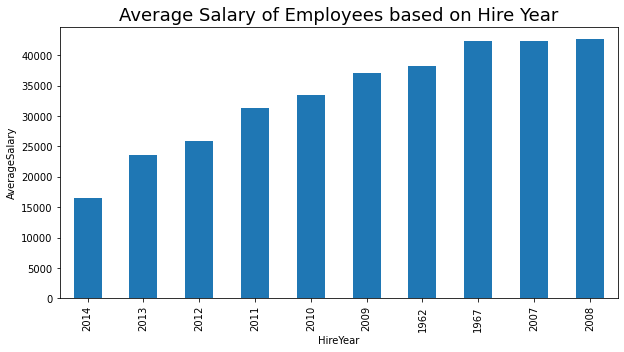

In [29]:
# Salary vs Hire Year
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel('AverageSalary')
plt.title("Average Salary of Employees based on Hire Year",fontsize=18)
plt.show()

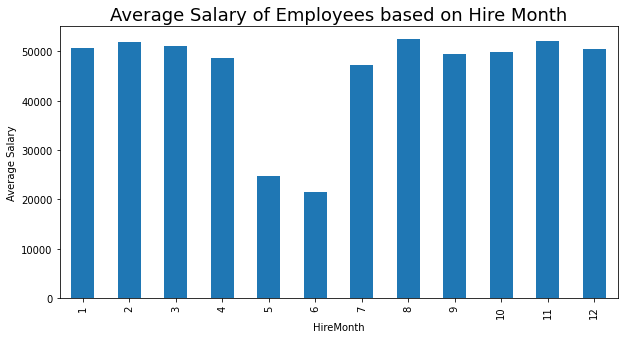

In [30]:
# Checking if Month hired has any such effect
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('Average Salary')
plt.title("Average Salary of Employees based on Hire Month",fontsize=18)
plt.show()

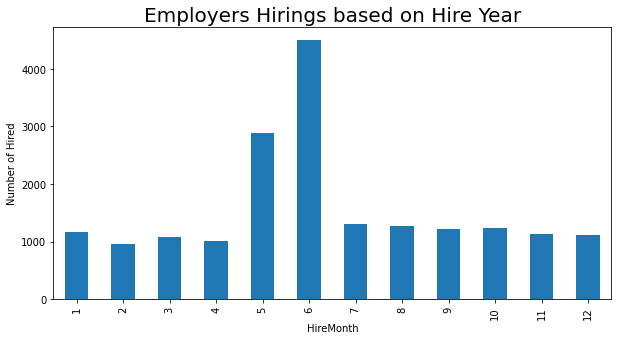

In [31]:
# Checking on which Month most people are hired
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel('Number of Hired')
plt.title("Employers Hirings based on Hire Year",fontsize=20)
plt.show()

<b> Lets check if there is any relation between any of the Numerical variables using pairplot</b>

<Figure size 1080x1440 with 0 Axes>

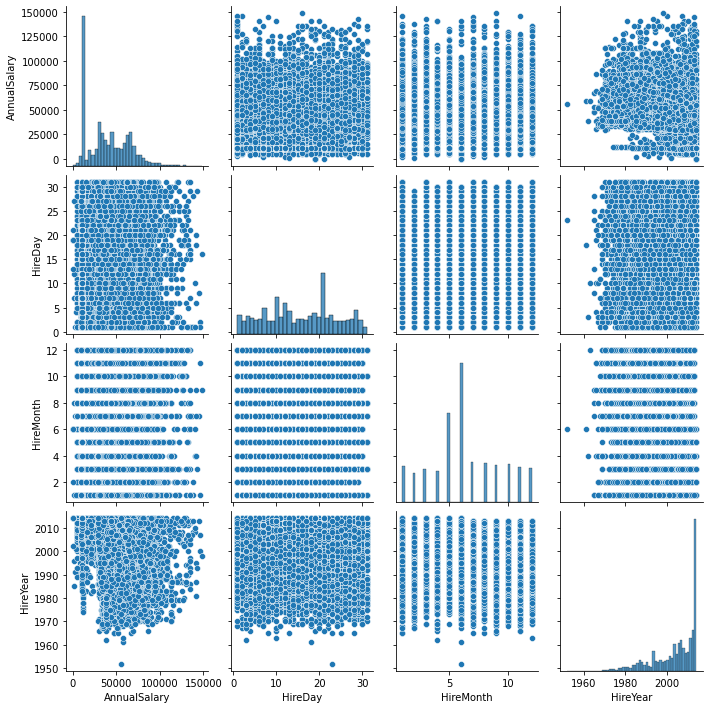

In [32]:
# Plot a pair plot
plt.figure(figsize=(15,20))
sns.pairplot(salary_cpy)
plt.show()

<b>Nothing seems to have any correlation. Lets visualize correlation coefficients using heatmap<b>

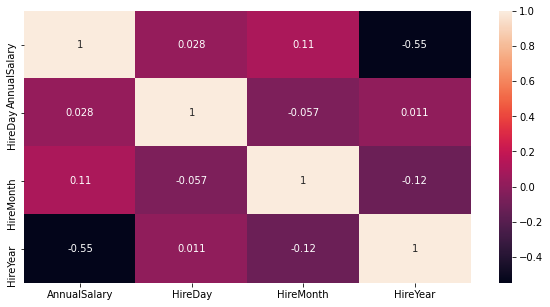

In [33]:
# Plot a heatMap
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(),annot=True)

<b>Except for HireYear nothing seems to have significant correlation with Annual Salary</b>

##  Feature Engineering

In [34]:
# Create a copy of data frame
salary_master = salary_cpy.copy()

<b> Linear Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding. </b>
 
<b>We are using Mean encoding as the number of labels of categorical variables are very high and so using others might either create unnecessary variables or labelling might not be that appropriate.</b>

In [35]:
salary_cpy

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,POLICE DEPARTMENT,01/23/2013,44104.0,23,1,2013


In [36]:
# Apply mean encoding for Job Title
mean_Job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
salary_master['JobTitle'] = salary_master['JobTitle'].map(mean_Job)

salary_master['JobTitle']

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18895, dtype: float64

In [37]:
# Apply mean encoding for Agency
mean_agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency'] = salary_master['Agency'].map(mean_agency)

print(salary_master['Agency'])

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61506.879579
             ...     
18976    11313.967200
18977    11313.967200
18978    61506.879579
18979    61506.879579
18980    42565.513078
Name: Agency, Length: 18895, dtype: float64


In [38]:
# Apply mean encoding for AgencyID
mean_agencyID = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID'] = salary_master['AgencyID'].map(mean_agencyID)

print(salary_master['AgencyID'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18895, dtype: float64


<b>We have converted all the required categorical variables to Numerical variables. Lets check the info to check if trhere are any non-numeric variables

In [39]:
# Check info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


<b> Since we have HireYear, HireMonth and HireDay , we no longer require Date field and Annual Income is never based on Name, so it is safe to remove both those columns</b>

In [40]:
# Drop Name, HireDate column
salary_master = salary_master.drop(['HireDate','Name'],axis=1)

# Check Info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18895 non-null  float64
 1   AgencyID      18895 non-null  float64
 2   Agency        18895 non-null  float64
 3   AnnualSalary  18895 non-null  float64
 4   HireDay       18895 non-null  int64  
 5   HireMonth     18895 non-null  int64  
 6   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


##  Train Test Split

<b>Split data into train and test set using train_test_split</b>

In [41]:
# Split data into train and test sets
salary_train, salary_test = train_test_split(salary_master,train_size=0.7, random_state=42)

<b>Check sizes of data to know whether they are split correctly

In [42]:
# Shape of train set
print(salary_train.shape)

# Shape of test set
print(salary_test.shape)

(13226, 7)
(5669, 7)


<b> Seperate Dependent and Independent Variables using pop</b>

In [43]:
# Divide train set into Dependent and independent variables
y_train = salary_train.pop('AnnualSalary')

X_train = salary_train


# Divide test set into Dependent and independent variables
y_test = salary_test.pop('AnnualSalary')

X_test = salary_test

<b>Scaling is a technique to standardize the independent features present in the data in a fixed range. We do this to make sure all the features are in same scale.</b>
<br>
There are two types of scaling:
 - Standard Scaling 
 - MinMax Scaling

<b>Here we will be using Standard Scaler function of sklearn</b>

In [44]:
# Scale the train
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,3.410750e-16,-2.445580e-16,-3.068769e-16,-1.107999e-16,-4.932039e-17,1.091302e-14
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.539463e+00,-1.685751e+00,-1.397984e+00,-1.766448e+00,-1.833646e+00,-5.029261e+00
25%,-1.158100e+00,-1.267888e+00,-1.346520e+00,-8.105477e-01,-4.721605e-01,-5.883256e-01
50%,-1.476380e-01,8.407664e-02,1.434622e-01,2.586518e-02,-1.317891e-01,2.805530e-01
75%,8.594492e-01,9.050343e-01,1.046531e+00,7.427905e-01,8.893253e-01,8.598055e-01
max,4.147233e+00,4.629334e+00,2.237763e+00,1.818178e+00,1.910440e+00,9.563475e-01


In [45]:
## Scale the test
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_test.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,-0.006849,-0.001602,-0.001378,-0.007458,-0.019873,-0.005037
std,0.987928,0.997438,1.003394,1.006810,1.011997,1.010818
min,-1.539463,-1.685751,-1.397984,-1.766448,-1.833646,-4.160382
25%,-1.158100,-1.267888,-1.346520,-0.810548,-0.472161,-0.588326
50%,-0.143918,0.097496,0.143462,0.025865,-0.131789,0.280553
75%,0.859449,0.889358,1.046531,0.742790,0.548954,0.859805
max,4.045484,3.121863,2.237763,1.818178,1.910440,0.956348


##  Model Building
<b> We are building a Linear Regression model for this project

<b>Linear regression may be defined as the statistical model that analyzes the linear relationship between a dependent variable with given set of independent variables. This is used for predicting the independent variables based on relationship between dependent and independent variables.<br>
It is a Supervised Learning Technique i.e., it requires historic data to form a relationship.<br><br>
There are two types of Linear Regression:<br>
     Simple Linear Regression<br>
     Multiple Linear Regression<br><br>

Simple Linear Regression predicts a response using a single feature. The assumption in Simple Linear Regression is that the two variables are linearly related.<br>
Multiple Linear Regression is the extension of simple linear regression that predicts a response using two or more features. 

<b>Let's see how a Linear Regression Works

<b>Generate a Linear Regression model by passing the X_train and y_train as inputs

In [46]:
# Build the model
lr = LinearRegression()

salary_reg = lr.fit(X_train,y_train)

<b> For any Linear regression model, we generally use R<sup>2</sup>.
R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for R-square is 1. The closer the value of R-square to 1, the better is the model fitted. So we haave to calculate R-Squared for the same. However this is made easy by sklearn and can be calculated as below </b>

In [47]:
# Verify the r2 score
salary_reg.score(X_train,y_train)

0.964833881870778

<b> We got a very high value for R-squared which is very close to 1, which means the independent variables are able to expalin 96% of  variance in the dependent variable.</b>

### Model Evaluation

<b>Even though our model performs well on train data, that doesn't mean the model is a good model. The model should perform equally good on the test data as well, i.e., data the model has not encountered till now.</b>
<b> So lets check how model performs on test data</b>

In [48]:
# r2 for test data
salary_reg.score(X_test,y_test)

0.9634621082754347

<b>The model performs well on the test data as well giving an R-squared of 0.963, which indicates the model generated is a good model and can be used for predicting the Salaries of Employees in Baltimore</b>

Note:
- <b> Here we did not face any issue of Overfitting even though we used all the columns. But in most models using all the columns will lead to Overfitting, which can be addressed by Regularization</b>

<b>Let's plot distribution plot to check whether Residuals satisfy assumptions of Linear Regression</b>

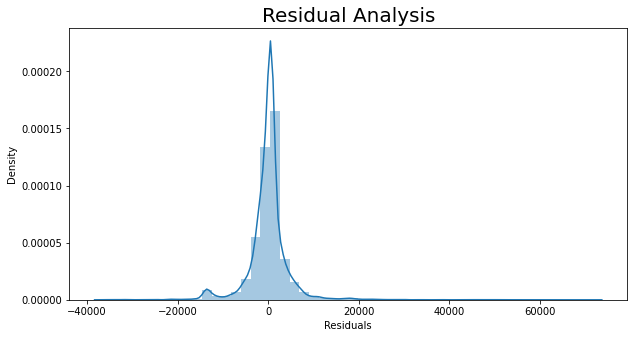

In [49]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))
y_train_pred = salary_reg.predict(X_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

<b>The Residual terms are normally distributed with mean at 0, which is one of the Assumption of Linear Regression

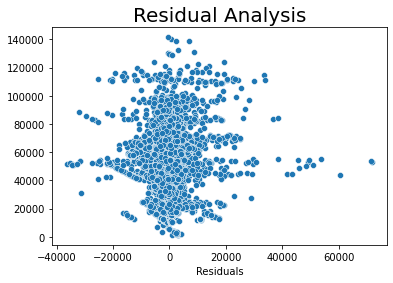

In [50]:
sns.scatterplot(x=res,y=y_train_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

<b>The Residuals are independent of each other ,which is another assumption in Linear Regression

<b> The model has generated can be used for Salary prediction .Let us check the coefficients and intercept </b>

In [51]:
# Print coef
print("Coefficients are:",salary_reg.coef_)

#print intercept
print("Intercept is:",salary_reg.intercept_)

Coefficients are: [22395.65357851  2798.67752824 -1694.55993659   -22.59156434
   -62.65873076 -2049.21601256]
Intercept is: 39628.221303493134


<b> Let us create a model equation and store it in a string</b>

In [52]:
model=str(salary_reg.intercept_)
for i in range(len(salary_reg.coef_)):
    model = model +' + '+ str(salary_reg.coef_[i]) + ' * ' + str(X_train.columns[i])
print(model)

39628.221303493134 + 22395.65357851083 * JobTitle + 2798.6775282355707 * AgencyID + -1694.5599365882206 * Agency + -22.5915643428943 * HireDay + -62.65873075557511 * HireMonth + -2049.21601255778 * HireYear


<b>Observations from Model:</b>
 - Of all the features given  AgencyID,JobTitle and HireYear are the major driver for expaining the variance of Annual Salary as they have higher coefficient value.
 - Out of the above features, Hire Year is negatively related to Annual Salary which is same as we have seen while performing EDA.